<a href="https://colab.research.google.com/github/tharasri58/Iris-data-set/blob/main/irisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import all the needed files

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

displaying the iris data set

In [ ]:
Iris_sort = data[['Species']].drop_duplicates().sort_values(by='Species')
Iris_sort

Species
0        Iris-setosa
50   Iris-versicolor
100   Iris-virginica

By using sort we found that there is 3 classes namely Iris-setosa	Iris-versicolor	Iris-virginica

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

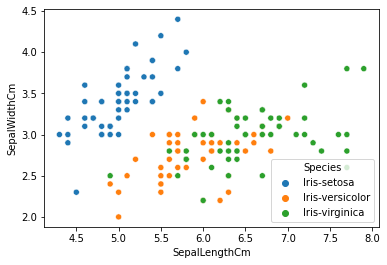

In [ ]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", data=data , hue='Species')
                    

Ploting the Sepal width and Sepal Length

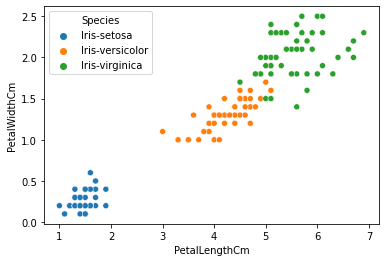

In [ ]:
sns.scatterplot(x="PetalLengthCm" , y="PetalWidthCm",data=data , hue='Species')

Plotting the Sepal width and Sepal Length

In [ ]:
oridinal_enc= OrdinalEncoder()
data['Encoded_Species'] = oridinal_enc.fit_transform(data[['Species']])


Encoding the Strings as Numbers

In [ ]:
data = data.drop(['Species'],axis=1)


As we doesnt need Species Name anymore, We drop the species in the data

In [ ]:
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3   4            4.6           3.1            1.5           0.2   
4   5            5.0           3.6            1.4           0.2   

   Encoded_Species  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [ ]:
y = data['Encoded_Species']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: Encoded_Species, Length: 150, dtype: float64

In [ ]:
X = data.drop(['Encoded_Species'],axis=1)

Separating X and y

In [ ]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: Encoded_Species, Length: 150, dtype: float64

In [ ]:
trainX,testX,trainY,testY = train_test_split(X, y, test_size=0.2,random_state=0)

Splitting the train and test sets

In [ ]:
print(trainX.shape,testX.shape,trainY.shape,testY.shape)

(120, 5) (30, 5) (120,) (30,)


Size of the train and test set

In [ ]:
lr=LogisticRegression()
lr.fit(trainX,trainY)
yhat=lr.predict(testX)

Using logistic Regression Algorithms

In [ ]:
classifier = GaussianNB()  
classifier.fit(trainX, trainY)

GaussianNB()

Using Naive Byes Gaussian Algorithms

In [ ]:
y_pred = classifier.predict(testX)

Assigning the predition to y_pred

In [ ]:
y_pred

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(testY, y_pred) 

To show the accuracy we use confusion matrices

In [ ]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

11+13+6=30 . There is 100% accuracy in the test set

In [ ]:
print(yhat,testY)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.] 114    2.0
62     1.0
33     0.0
107    2.0
7      0.0
100    2.0
40     0.0
86     1.0
76     1.0
71     1.0
134    2.0
51     1.0
73     1.0
54     1.0
63     1.0
37     0.0
78     1.0
90     1.0
45     0.0
16     0.0
121    2.0
66     1.0
24     0.0
8      0.0
126    2.0
22     0.0
44     0.0
97     1.0
93     1.0
26     0.0
Name: Encoded_Species, dtype: float64


Displayin the Logistic regression accuracy. There is 100% accuracy in the logistic regression.